In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# Load the dataset with the correct delimiter (comma)
file_path = 'data.csv'
df = pd.read_csv(file_path)

In [3]:
# Clean column names by removing leading/trailing whitespaces
df.columns = df.columns.str.strip()

In [4]:
# Convert 'Buys' column into numeric using LabelEncoder
le = LabelEncoder()
df['Buys'] = le.fit_transform(df['Buys'])

In [5]:
# One-hot encode the categorical features
df = pd.get_dummies(df, columns=['Age', 'Income', 'Gender', 'MaritialStatus'])

In [6]:
# Separate features and target variable
X = df.drop('Buys', axis=1)
y = df['Buys']

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Create a decision tree classifier
clf = DecisionTreeClassifier()

In [9]:
# Train the model on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [11]:
# Calculate accuracy and print the confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [12]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 1.0
Confusion Matrix:
[[1 0]
 [0 2]]


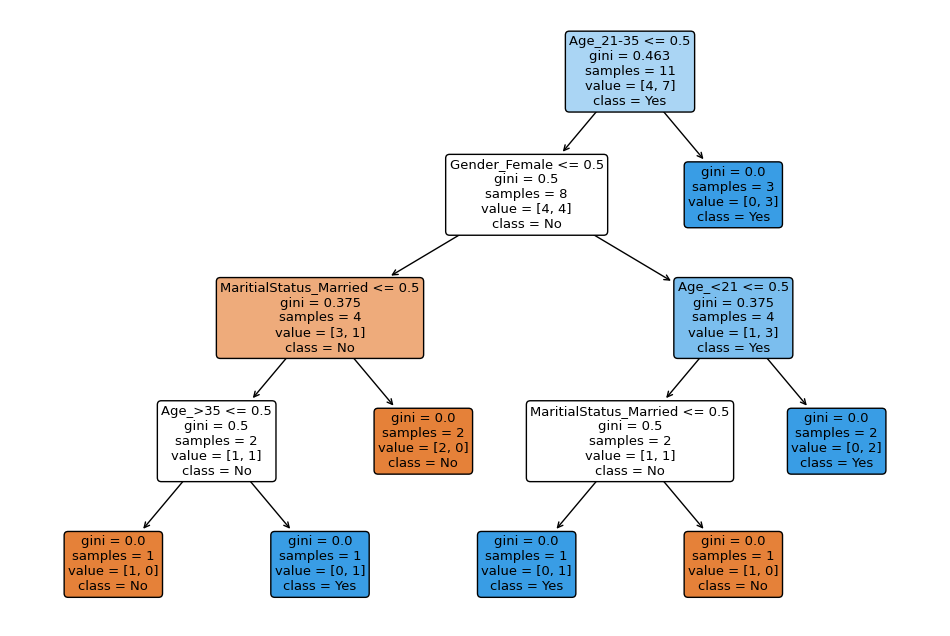

In [13]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns.tolist(), class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()